In [171]:
import pandas as pd
import os

In [172]:
os.chdir("/users/kagoi/csvs")

In [173]:
df = pd.read_csv("amazon_sales_dataset.csv")
df.set_index("order_id", inplace=True)
df

,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
order_id,,,,,,,,,,,,
1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72
...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_date        50000 non-null  object 
 1   product_id        50000 non-null  int64  
 2   product_category  50000 non-null  object 
 3   price             50000 non-null  float64
 4   discount_percent  50000 non-null  int64  
 5   quantity_sold     50000 non-null  int64  
 6   customer_region   50000 non-null  object 
 7   payment_method    50000 non-null  object 
 8   rating            50000 non-null  float64
 9   review_count      50000 non-null  int64  
 10  discounted_price  50000 non-null  float64
 11  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 5.0+ MB


In [175]:
df["payment_method"] = df["payment_method"].astype("category")

In [176]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        50000 non-null  datetime64[ns]
 1   product_id        50000 non-null  int64         
 2   product_category  50000 non-null  object        
 3   price             50000 non-null  float64       
 4   discount_percent  50000 non-null  int64         
 5   quantity_sold     50000 non-null  int64         
 6   customer_region   50000 non-null  object        
 7   payment_method    50000 non-null  category      
 8   rating            50000 non-null  float64       
 9   review_count      50000 non-null  int64         
 10  discounted_price  50000 non-null  float64       
 11  total_revenue     50000 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 4.6+ MB


In [178]:
counting_payment = df["payment_method"].value_counts().reset_index()
counting_payment.columns = ["payment_method", "count"]
counting_payment_sorted = counting_payment.sort_values(by="count", ascending=False)
counting_payment

,payment_method,count
0,Wallet,10106
1,UPI,10078
2,Debit Card,9981
3,Cash on Delivery,9927
4,Credit Card,9908


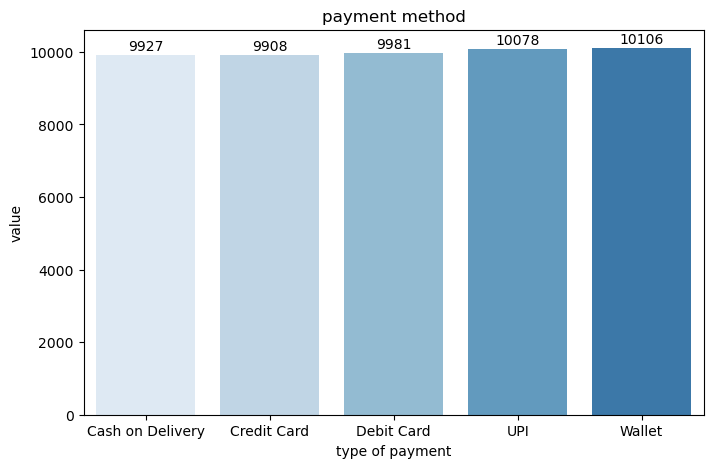

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=counting_payment,
    x="payment_method",
    y="count"
)
sns.set_palette("Blues")
ax.set_title("payment method")
ax.set_xlabel("type of payment")
ax.set_ylabel("value")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 1),
        textcoords='offset points'
    )
    
    
plt.show()

In [180]:
date_with_most_order = df["order_date"].value_counts(ascending=False)
date_with_most_order

order_date
2023-10-19    93
2022-04-16    89
2022-12-09    88
2022-10-20    88
2023-03-14    87
              ..
2022-04-01    51
2023-07-06    51
2023-02-22    50
2022-01-15    50
2023-04-15    48
Name: count, Length: 730, dtype: int64

In [181]:
top_5_df = date_with_most_order.head(5)
top_5_df = top_5_df.reset_index()
top_5_df.columns = ["order_date", "count"]

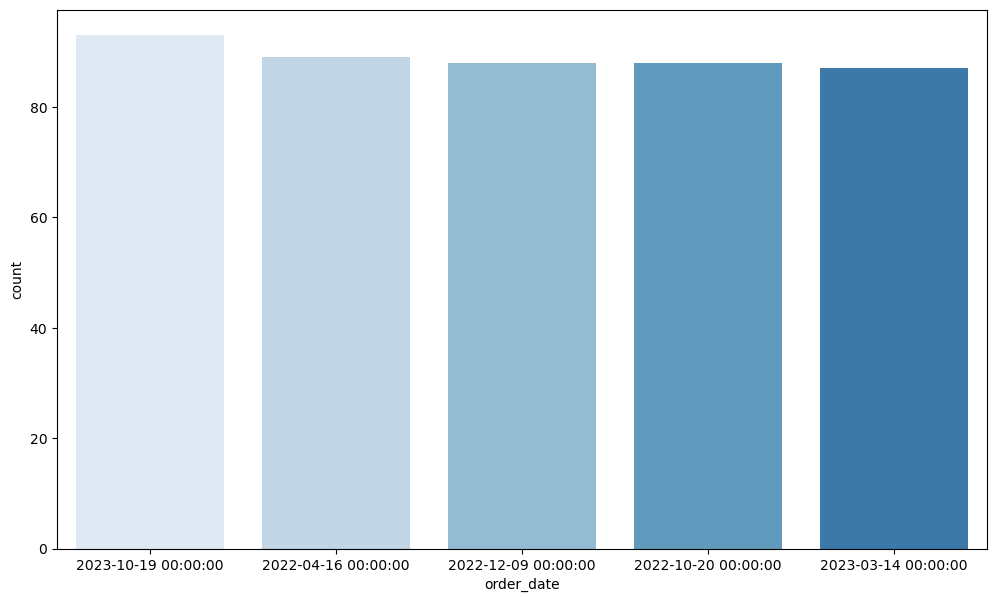

In [182]:
colors = ["#cce5ff", "#99ccff", "#66b2ff", "#3399ff", "#007fff"]


plt.figure(figsize=(12,7))
sns.barplot(data=top_5_df, x="order_date", y="count")
sns.set_palette("Blues")
ax.set_xlabel("Order Date")
ax.set_ylabel("Count")
ax.set_title("Top 5 order dates")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 1),
        textcoords='offset points'
    )

plt.show()

In [183]:
df["customer_region"] = df["customer_region"].astype("category") 

region = df["customer_region"].value_counts()
region

customer_region
Asia             12526
North America    12517
Middle East      12505
Europe           12452
Name: count, dtype: int64

In [184]:
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.month_name()

In [185]:
df_2022 = df[df["year"] == 2022]
df_2022
top_5_months_2022 = df_2022["order_date"].dt.month_name().value_counts().head(5).reset_index()
top_5_months_2022.columns = ["month_name", "count"]
top_5_months_2022

,month_name,count
0,August,2189
1,March,2155
2,January,2151
3,September,2100
4,July,2093


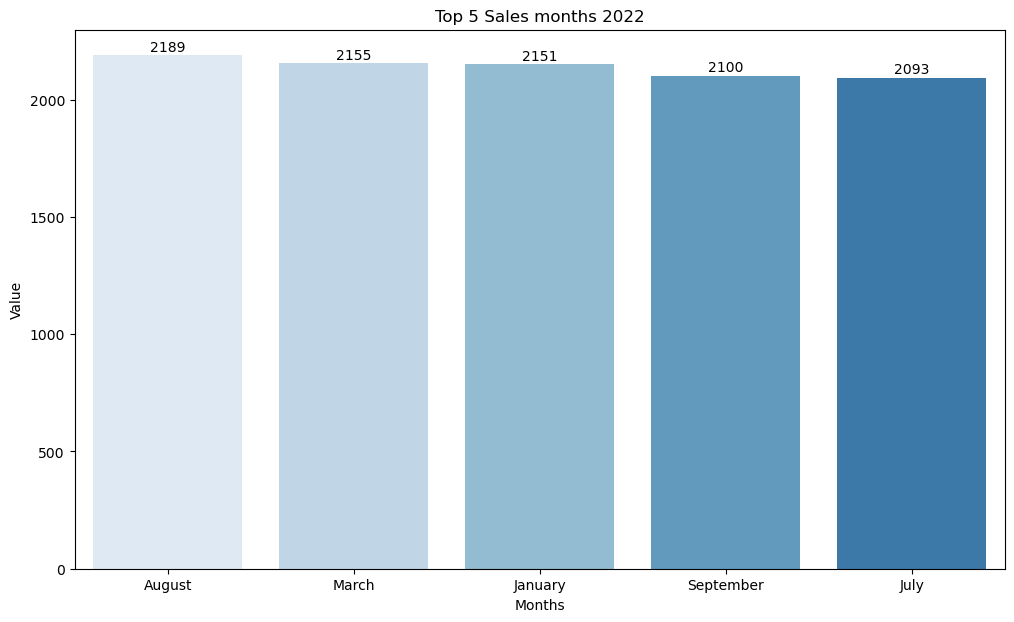

In [186]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=top_5_months_2022, x="month_name", y="count")
sns.set_palette("Blues")
ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Top 5 Sales months 2022")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 1),
        textcoords='offset points'
    )

plt.show()

In [187]:
df_2023 = df[df["year"] == 2023]
df_2023
top_5_months_2023 = df_2023["order_date"].dt.month_name().value_counts().head(5).reset_index()
top_5_months_2023.columns = ["month_name", "count"]
top_5_months_2023

,month_name,count
0,July,2216
1,January,2187
2,August,2162
3,October,2159
4,May,2154


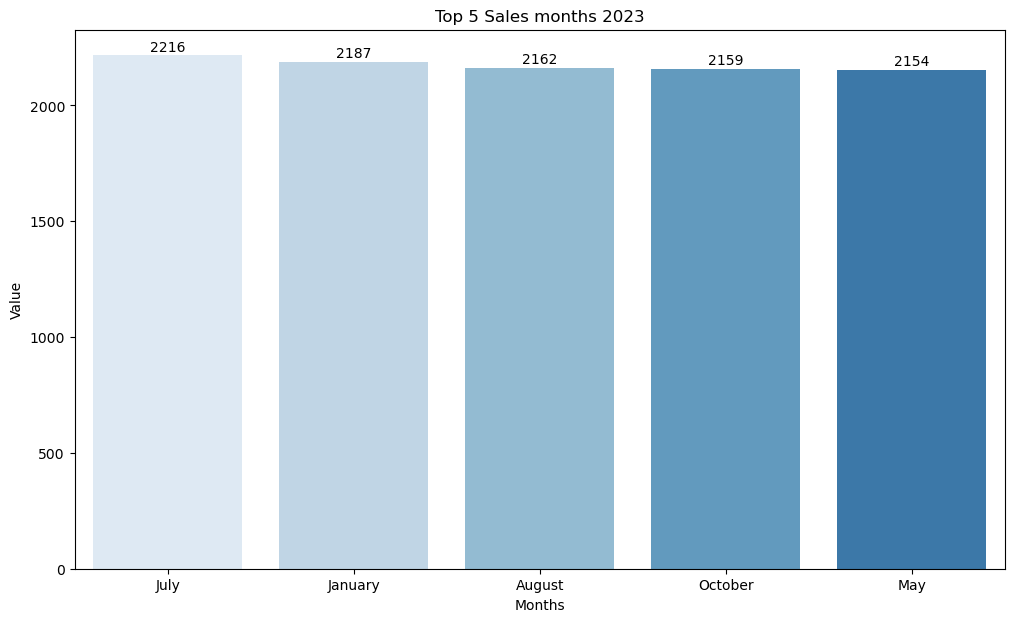

In [188]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=top_5_months_2023, x="month_name", y="count")
sns.set_palette("Blues")
ax.set_xlabel("Months")
ax.set_ylabel("Value")
ax.set_title("Top 5 Sales months 2023")

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 1),
        textcoords='offset points'
    )

plt.show()

In [189]:
df["product_category"] = df["product_category"].astype("category")

product_type = df["product_category"].value_counts()
product_type

product_category
Beauty            8465
Fashion           8365
Books             8327
Electronics       8320
Sports            8265
Home & Kitchen    8258
Name: count, dtype: int64

In [190]:
books_df = df[df["product_category"].str.lower() == "books"].copy()
books_df["order_date"] = pd.to_datetime(books_df["order_date"])
books_df["month_name"] = books_df["order_date"].dt.month_name()
books_per_month = books_df.groupby("month_name").size().reset_index(name="books_count")
top_5_months_of_books_2023 = top_5_months_2023.merge(books_per_month, on="month_name", how="left")
top_5_months_of_books_2023 = top_5_months_of_books_2023.sort_values(by="books_count", ascending=False)
top_5_months_of_books_2023["books_count"] = top_5_months_of_books_2023["books_count"].fillna(0)



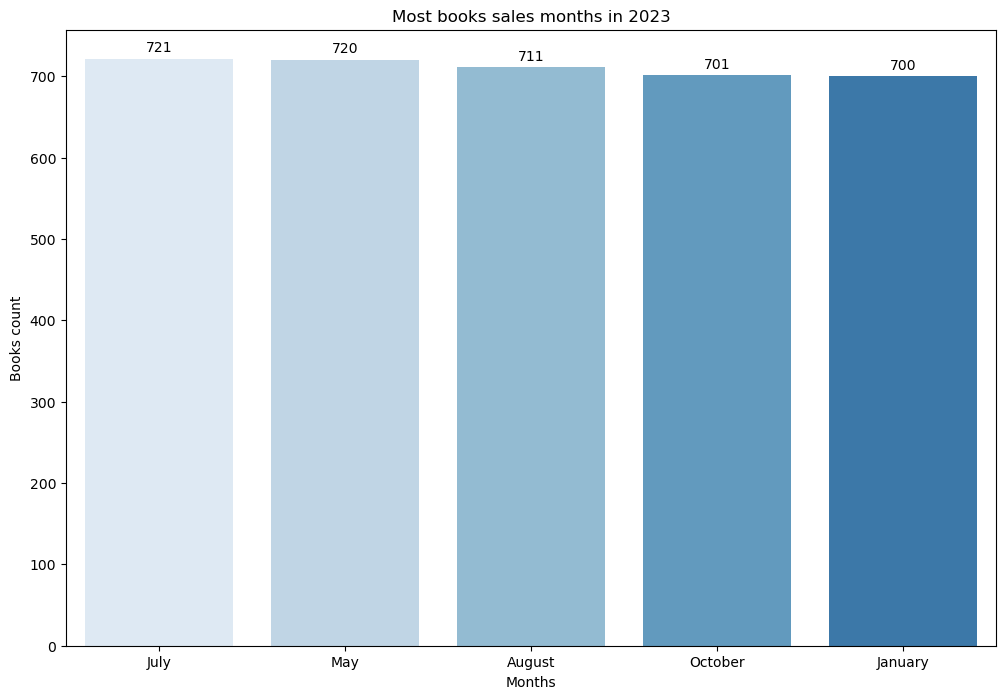

In [191]:
plt.figure(figsize=(12, 8))
sns.set_palette("Blues")
ax = sns.barplot(
    data=top_5_months_of_books_2023,
    x="month_name",
    y="books_count"
)

ax.set_xlabel("Months")
ax.set_ylabel("Books count")
ax.set_title("Most books sales months in 2023")

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        xytext=(0, 3),
        textcoords="offset points"
    )
plt.show()

In [192]:
top_5_months_of_books_2022 = top_5_months_2022.merge(books_per_month, on="month_name", how="left")
top_5_months_of_books_2022["books_count"] = top_5_months_of_books_2022["books_count"].fillna(0)
top_5_months_of_books_2022 = top_5_months_of_books_2022.sort_values(by="books_count", ascending=False)

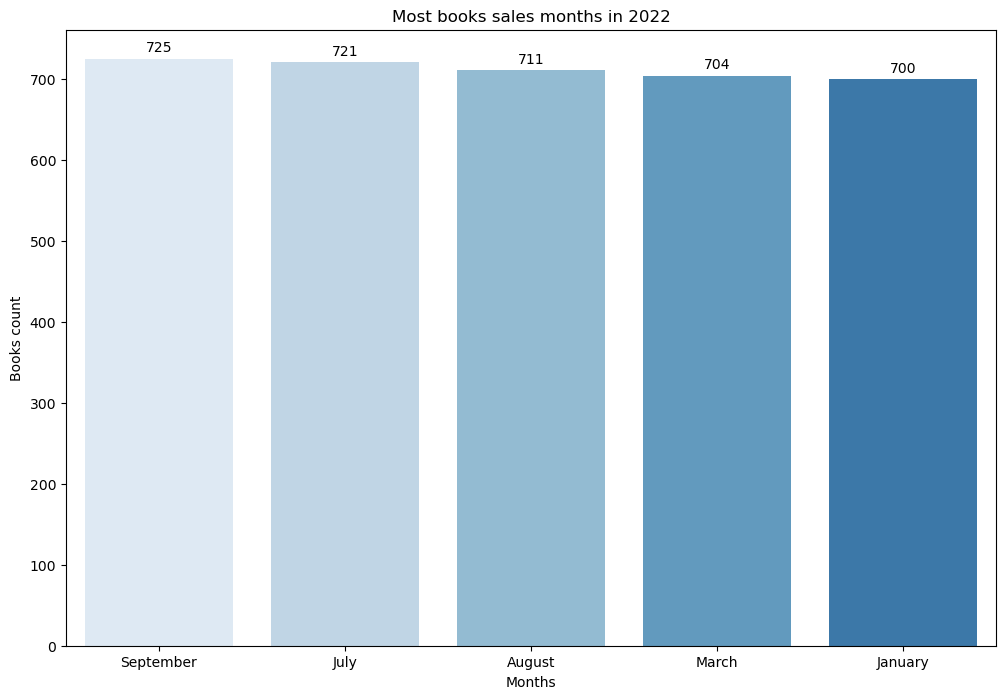

In [193]:
plt.figure(figsize=(12, 8))
sns.set_palette("Blues")
ax = sns.barplot(
    data=top_5_months_of_books_2022,
    x="month_name",
    y="books_count"
)

ax.set_xlabel("Months")
ax.set_ylabel("Books count")
ax.set_title("Most books sales months in 2022")

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        xytext=(0, 3),
        textcoords="offset points"
    )
plt.show()

In [194]:
df.to_csv("Project_5.csv")